In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [13]:
df = pd.read_csv('Titanic_Dataset.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.duplicated().sum().item()

0

In [17]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.drop(columns='Cabin', inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [21]:
df[df['Ticket'] ==  '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [22]:
df.dropna(inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

,count
Survived,
0,549
1,340


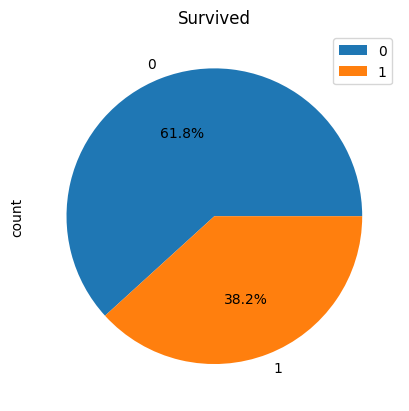

In [23]:
survived = df['Survived'].value_counts()

survived.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Survived')
pd.DataFrame(survived)

,count
Pclass,
3,491
1,214
2,184


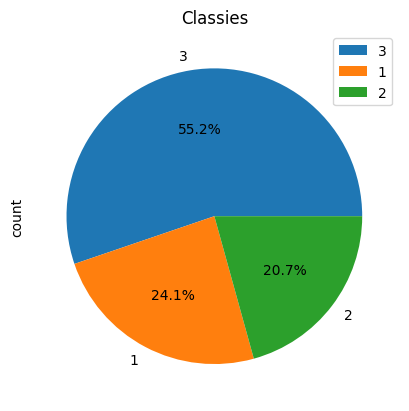

In [24]:
Pclass = df['Pclass'].value_counts()

Pclass.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Classies')
pd.DataFrame(Pclass)

,count
Sex,
male,577
female,312


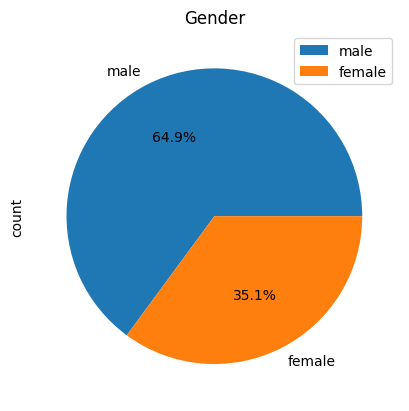

In [25]:
sex = df['Sex'].value_counts()

sex.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Gender')
pd.DataFrame(sex)

In [26]:
age = df['Age']
pd.DataFrame(age.describe())

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [28]:
fare = df['Fare']
pd.DataFrame(fare.describe())

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


count
Survived Pclass       
0        3         372
         2          97
         1          80
1        1         134
         3         119
         2          87

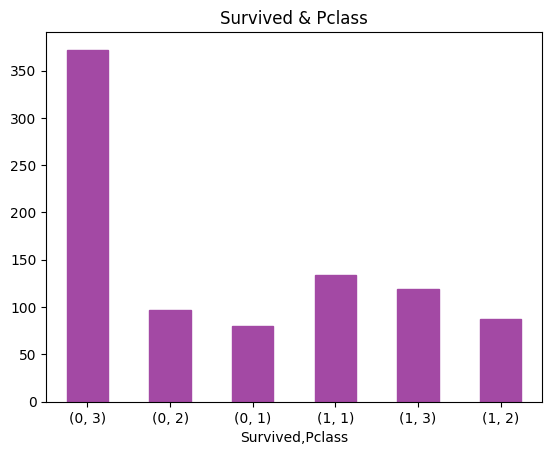

In [29]:
x = df.groupby(['Survived'])['Pclass'].value_counts()

x.plot(kind='bar', color='#A349A4', edgecolor='#A349A4', title='Survived & Pclass')
plt.xticks(rotation=0) 
pd.DataFrame(x)

count
Survived Sex          
0        male      468
         female     81
1        female    231
         male      109

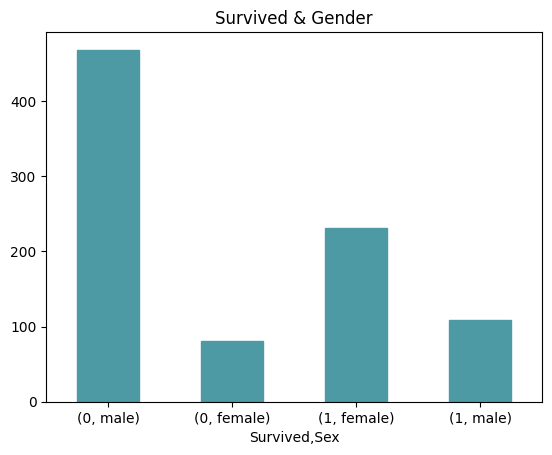

In [30]:
x = df.groupby(['Survived'])['Sex'].value_counts()

x.plot(kind='bar', color='#4D9AA4', edgecolor='#4D9AA4', title='Survived & Gender')
plt.xticks(rotation=0)
pd.DataFrame(x)

In [31]:
x = df.groupby(['Survived'])['Age']
pd.DataFrame(x.describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,340.0,28.163735,13.672269,0.42,21.0,28.0,35.0,80.0


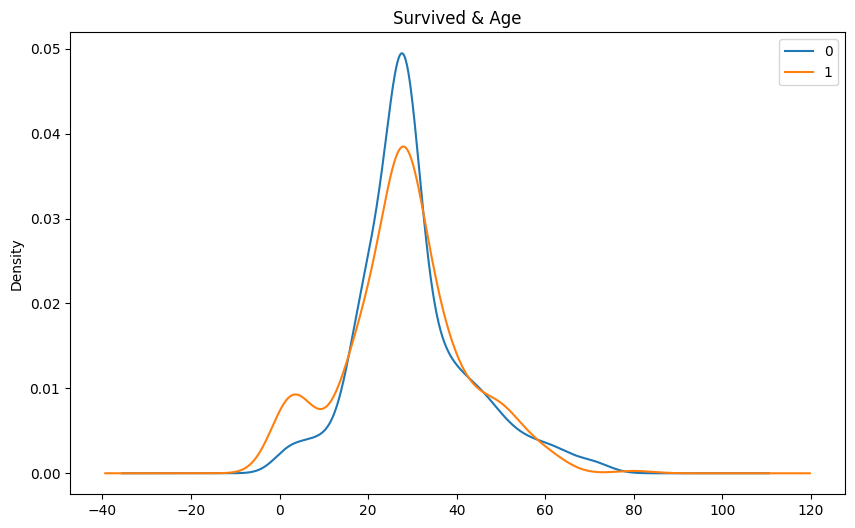

In [32]:
plt.figure(figsize=(10,6))

x.plot(kind='kde', legend=True, title='Survived & Age')
plt.show()

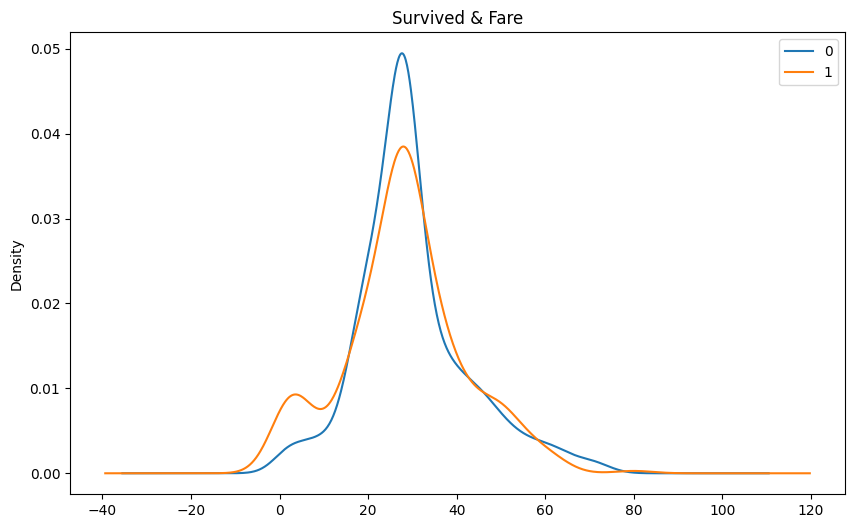

In [33]:
plt.figure(figsize=(10,6))

x.plot(kind='kde', legend=True, title='Survived & Fare')
plt.show()

In [36]:
df.drop(columns=['PassengerId','Name','Ticket','Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [38]:
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])

In [39]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [40]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [42]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = KNeighborsClassifier()
model_4 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()

In [44]:
model_1.fit(x_train,y_train)

LogisticRegression()

In [45]:
model_2.fit(x_train,y_train)

SVC()

In [46]:
model_3.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
model_4.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
model_5.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = model_1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 22]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [50]:
y_pred = model_2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [51]:
y_pred = model_3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 19]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



C:\Tools\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
y_pred = model_4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86 23]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [53]:
y_pred = model_5.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 21]
 [17 52]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [67]:
model_6 = BaggingClassifier()

In [68]:
model_7 = ExtraTreesClassifier()

In [69]:
model_8 = AdaBoostClassifier()

In [70]:
model_9 = XGBClassifier(verbose=0)

In [71]:
model_10 = CatBoostClassifier(verbose=0)

In [72]:
model_6.fit(x_train,y_train)

BaggingClassifier()

In [73]:
model_7.fit(x_train,y_train)

ExtraTreesClassifier()

In [74]:
model_8.fit(x_train,y_train)

AdaBoostClassifier()

In [75]:
model_9.fit(x_train,y_train)

[12:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
model_10.fit(x_train,y_train)

In [77]:
y_pred = model_6.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 21]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [78]:
y_pred = model_7.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85 24]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [79]:
y_pred = model_8.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89 20]
 [13 56]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [80]:
y_pred = model_9.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 19]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [81]:
y_pred = model_10.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91 18]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [82]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10]
models_names = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier',
                'XGBClassifier', 'CatBoostClassifier']

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10  or train>=1.00:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
})

# Show result:
model_score

C:\Tools\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Tools\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or 

,Model,Train score,Test score,Ratio difference,Evaluate model
0,LogisticRegression,79.32%,78.65%,0.67%,middle
1,SVC,81.15%,79.78%,1.38%,"high train, low test"
2,KNeighborsClassifier,87.34%,80.34%,7.00%,good
3,DecisionTreeClassifier,98.45%,78.09%,20.36%,overfite
4,RandomForestClassifier,98.45%,78.65%,19.80%,overfite
5,BaggingClassifier,96.62%,79.21%,17.41%,overfite
6,ExtraTreesClassifier,98.45%,77.53%,20.92%,overfite
7,AdaBoostClassifier,83.83%,81.46%,2.36%,good
8,XGBClassifier,96.34%,80.34%,16.01%,overfite
9,CatBoostClassifier,91.28%,80.9%,10.38%,overfite
